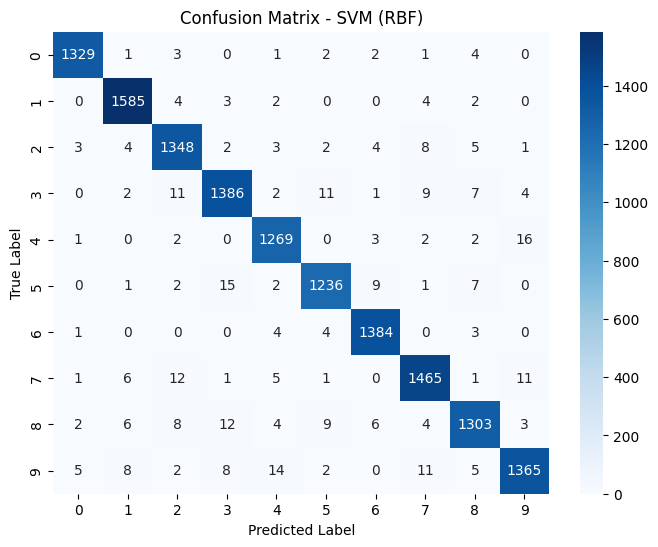

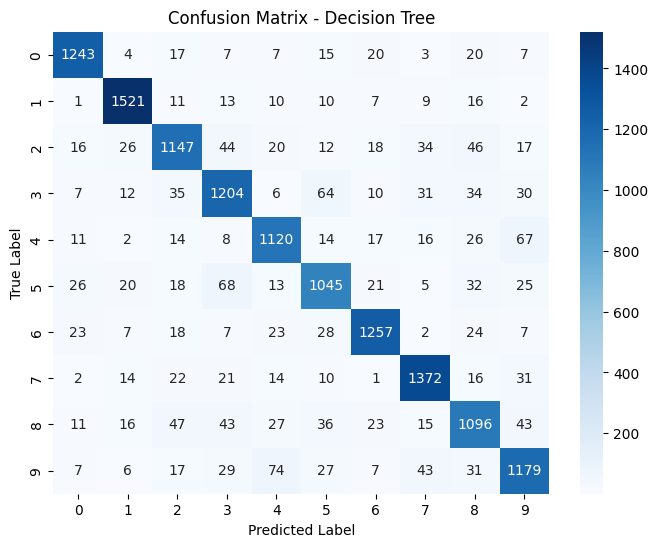

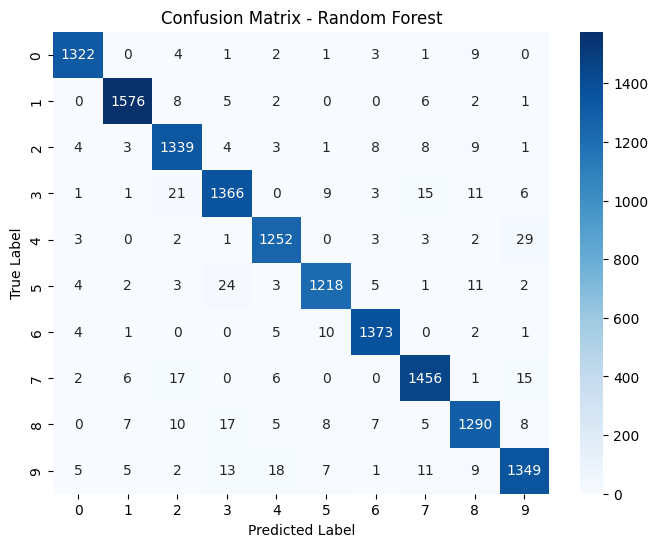

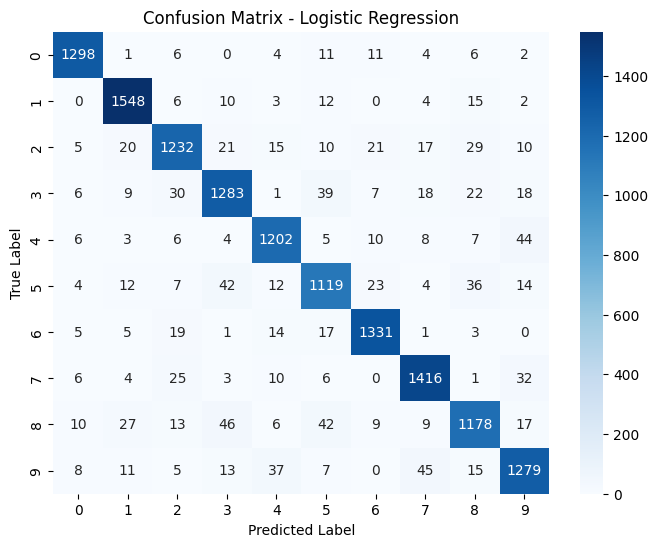


 Model Comparison:
SVM: Accuracy = 0.9764, F1 Score = 0.9764
Decision Tree: Accuracy = 0.8703, F1 Score = 0.8701
Random Forest: Accuracy = 0.9672, F1 Score = 0.9672
Logistic Regression: Accuracy = 0.9204, F1 Score = 0.9202


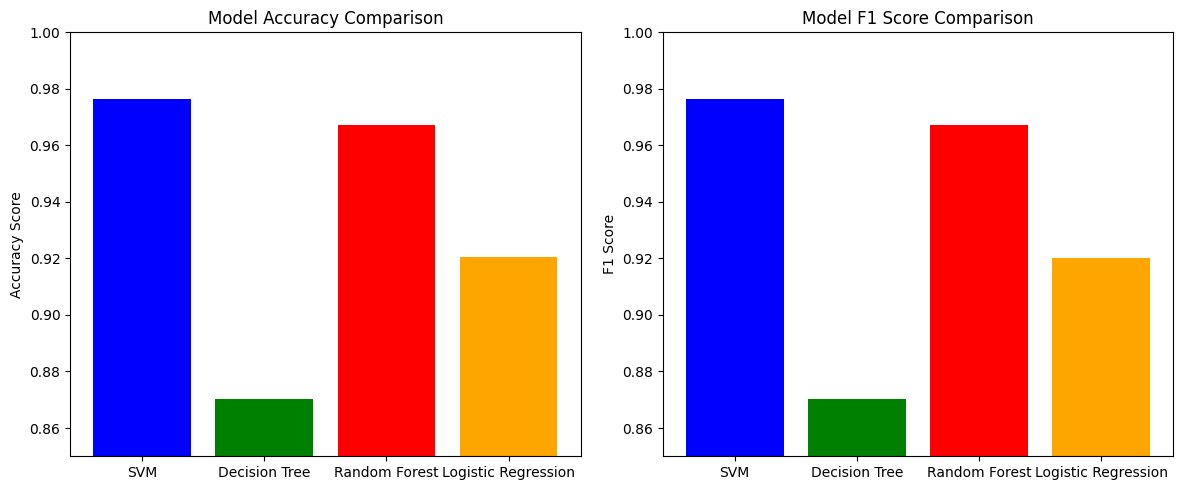

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

# Normalize pixel values
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store results
results = {}

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

svm_model = SVC(kernel='rbf', gamma='scale')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
results["SVM"] = (accuracy_svm, f1_svm)

plot_confusion_matrix(y_test, y_pred_svm, "SVM (RBF)")

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
results["Decision Tree"] = (accuracy_dt, f1_dt)

plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
results["Random Forest"] = (accuracy_rf, f1_rf)

plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
results["Logistic Regression"] = (accuracy_lr, f1_lr)

plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")

print("\n Model Comparison:")
for model, scores in results.items():
    print(f"{model}: Accuracy = {scores[0]:.4f}, F1 Score = {scores[1]:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(results.keys(), [acc[0] for acc in results.values()], color=['blue', 'green', 'red', 'orange'])
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.ylim(0.85, 1)

plt.subplot(1, 2, 2)
plt.bar(results.keys(), [acc[1] for acc in results.values()], color=['blue', 'green', 'red', 'orange'])
plt.ylabel("F1 Score")
plt.title("Model F1 Score Comparison")
plt.ylim(0.85, 1)

plt.tight_layout()
plt.show()